# Is college worth your dollar?

With average student debt rising year-on-year, a constant topic of debate always is whether college is worth the financial investment you make.

Personally, I feel in certain fileds like Computer Science, a formal education is not always necessary or optimal for that matter. With that being said, college teaches you a lot of other skills that sets you up nicely for your first job.

In the data below we explore how salaries differ over college majors, school type and region with values for different salary attributes like 'Starting Median Salary', 'Mid-Career Median Salary' or salary across various mid-career percentiles.

In [1]:
# import required libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
# read csv files as Pandas DataFrame
salaries_major = pd.read_csv('degrees-that-pay-back.csv')
salaries_college = pd.read_csv('salaries-by-college-type.csv')
salaries_region = pd.read_csv('salaries-by-region.csv')

In [3]:
# .head() shows top 5 rows of the dataset
salaries_major.head()

,Undergraduate Major,Starting Median Salary,Mid-Career Median Salary,Percent change from Starting to Mid-Career Salary,Mid-Career 10th Percentile Salary,Mid-Career 25th Percentile Salary,Mid-Career 75th Percentile Salary,Mid-Career 90th Percentile Salary
0,Accounting,"$46,000.00","$77,100.00",67.6,"$42,200.00","$56,100.00","$108,000.00","$152,000.00"
1,Aerospace Engineering,"$57,700.00","$101,000.00",75.0,"$64,300.00","$82,100.00","$127,000.00","$161,000.00"
2,Agriculture,"$42,600.00","$71,900.00",68.8,"$36,300.00","$52,100.00","$96,300.00","$150,000.00"
3,Anthropology,"$36,800.00","$61,500.00",67.1,"$33,800.00","$45,500.00","$89,300.00","$138,000.00"
4,Architecture,"$41,600.00","$76,800.00",84.6,"$50,600.00","$62,200.00","$97,000.00","$136,000.00"


In [4]:
salaries_college.head()

,School Name,School Type,Starting Median Salary,Mid-Career Median Salary,Mid-Career 10th Percentile Salary,Mid-Career 25th Percentile Salary,Mid-Career 75th Percentile Salary,Mid-Career 90th Percentile Salary
0,Massachusetts Institute of Technology (MIT),Engineering,"$72,200.00","$126,000.00","$76,800.00","$99,200.00","$168,000.00","$220,000.00"
1,California Institute of Technology (CIT),Engineering,"$75,500.00","$123,000.00",NaN,"$104,000.00","$161,000.00",NaN
2,Harvey Mudd College,Engineering,"$71,800.00","$122,000.00",NaN,"$96,000.00","$180,000.00",NaN
3,"Polytechnic University of New York, Brooklyn",Engineering,"$62,400.00","$114,000.00","$66,800.00","$94,300.00","$143,000.00","$190,000.00"
4,Cooper Union,Engineering,"$62,200.00","$114,000.00",NaN,"$80,200.00","$142,000.00",NaN


In [5]:
salaries_region.head()

,School Name,Region,Starting Median Salary,Mid-Career Median Salary,Mid-Career 10th Percentile Salary,Mid-Career 25th Percentile Salary,Mid-Career 75th Percentile Salary,Mid-Career 90th Percentile Salary
0,Stanford University,California,"$70,400.00","$129,000.00","$68,400.00","$93,100.00","$184,000.00","$257,000.00"
1,California Institute of Technology (CIT),California,"$75,500.00","$123,000.00",NaN,"$104,000.00","$161,000.00",NaN
2,Harvey Mudd College,California,"$71,800.00","$122,000.00",NaN,"$96,000.00","$180,000.00",NaN
3,"University of California, Berkeley",California,"$59,900.00","$112,000.00","$59,500.00","$81,000.00","$149,000.00","$201,000.00"
4,Occidental College,California,"$51,900.00","$105,000.00",NaN,"$54,800.00","$157,000.00",NaN


In [6]:
# The .info() method shows the names of columns, number of non-null (non-missing) rows of data and the data type.
salaries_region.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 320 entries, 0 to 319
Data columns (total 8 columns):
School Name                          320 non-null object
Region                               320 non-null object
Starting Median Salary               320 non-null object
Mid-Career Median Salary             320 non-null object
Mid-Career 10th Percentile Salary    273 non-null object
Mid-Career 25th Percentile Salary    320 non-null object
Mid-Career 75th Percentile Salary    320 non-null object
Mid-Career 90th Percentile Salary    273 non-null object
dtypes: object(8)
memory usage: 20.1+ KB


We note that salaries_by_region has the most rows of data and that is what we will use for most of our data exploration

In [7]:
# .describe() method doesn't show statistics such as mean, median, std etc. since they are not integer data types
salaries_region.describe()

,School Name,Region,Starting Median Salary,Mid-Career Median Salary,Mid-Career 10th Percentile Salary,Mid-Career 25th Percentile Salary,Mid-Career 75th Percentile Salary,Mid-Career 90th Percentile Salary
count,320,320,320,320,273,320,320,273
unique,320,5,168,204,166,217,130,115
top,Skidmore College,Northeastern,"$42,600.00","$110,000.00","$43,000.00","$54,100.00","$122,000.00","$150,000.00"
freq,1,100,6,5,5,5,10,10


In [8]:
# figuring out the type shows it as a string
type(salaries_region['Starting Median Salary'][0])

str

In [9]:
# Changing the column names for easy reference
salaries_region.columns = ['School', 'Region', 'Start','Median','Percentile10','Percentile25','Percentile75','Percentile90']
salaries_region.head()

,School,Region,Start,Median,Percentile10,Percentile25,Percentile75,Percentile90
0,Stanford University,California,"$70,400.00","$129,000.00","$68,400.00","$93,100.00","$184,000.00","$257,000.00"
1,California Institute of Technology (CIT),California,"$75,500.00","$123,000.00",NaN,"$104,000.00","$161,000.00",NaN
2,Harvey Mudd College,California,"$71,800.00","$122,000.00",NaN,"$96,000.00","$180,000.00",NaN
3,"University of California, Berkeley",California,"$59,900.00","$112,000.00","$59,500.00","$81,000.00","$149,000.00","$201,000.00"
4,Occidental College,California,"$51,900.00","$105,000.00",NaN,"$54,800.00","$157,000.00",NaN


In [10]:
salaries_major.columns = ['Major','Start','Median','Percent_Change','Percentile10','Percentile25','Percentile75','Percentile90']
salaries_college.columns = ['School', 'Type', 'Start','Median','Percentile10','Percentile25','Percentile75','Percentile90']


In [11]:
numerical_cols = ['Start','Median','Percentile10','Percentile25','Percentile75','Percentile90']

#DataFrame.convert_objects has been deprecated in favor of type-specific functions from Pandas (0.17.0)

for x in numerical_cols:
    salaries_major[x] = salaries_major[x].str.replace("$","")
    salaries_major[x] = salaries_major[x].str.replace(",","")
    salaries_major[x] = pd.to_numeric(salaries_major[x])
    

for x in numerical_cols:
    salaries_college[x] = salaries_college[x].str.replace("$","")
    salaries_college[x] = salaries_college[x].str.replace(",","")
    salaries_college[x] = pd.to_numeric(salaries_college[x])
    

for x in numerical_cols:
    salaries_region[x] = salaries_region[x].str.replace("$","")
    salaries_region[x] = salaries_region[x].str.replace(",","")
    salaries_region[x] = pd.to_numeric(salaries_region[x])

In [12]:
#Now, we can view the statistics for the data.
salaries_region.describe()

,Start,Median,Percentile10,Percentile25,Percentile75,Percentile90
count,320.000000,320.000000,273.000000,320.000000,320.000000,273.000000
mean,46253.437500,83934.375000,45253.113553,60614.062500,116496.875000,160442.124542
std,6617.038001,15191.443091,8562.834333,11786.436432,24104.265214,36785.768186
min,34500.000000,43900.000000,25600.000000,31800.000000,60900.000000,85700.000000
25%,42000.000000,73725.000000,39500.000000,53100.000000,99825.000000,136000.000000
50%,45100.000000,82700.000000,43700.000000,59400.000000,113000.000000,154000.000000
75%,48900.000000,93250.000000,48900.000000,66025.000000,129000.000000,178000.000000
max,75500.000000,134000.000000,80000.000000,104000.000000,234000.000000,326000.000000


We can observe that the count of rows in percentile10 and percentile90 is lesser, since they contain missing values.

We aim to fill in the missing values with median.
We create a copy of the df containing only columns woth missing values

In [13]:
salaries_region_missing = salaries_region[['Percentile10','Percentile90']].copy()
print(salaries_region_missing.head())

   Percentile10  Percentile90
0       68400.0      257000.0
1           NaN           NaN
2           NaN           NaN
3       59500.0      201000.0
4           NaN           NaN


In [14]:
from sklearn.preprocessing import Imputer

In [15]:
# We create an instance of the imputer.
imputer = Imputer(strategy='median')

In [16]:
# We now fit this instance of imputer on the df containing only columns having missing values 
imputer.fit(salaries_region_missing)

Imputer(axis=0, copy=True, missing_values='NaN', strategy='median', verbose=0)

In [17]:
imputer.statistics_

array([  43700.,  154000.])

In [18]:
tr = imputer.transform(salaries_region_missing)
salaries_region_tr = pd.DataFrame(tr,columns=salaries_region_missing.columns)

In [19]:
type(tr)

numpy.ndarray

In [20]:
# We can now see that there are no missing values in the transformed DataFrame salaries_region_tr 
salaries_region_tr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 320 entries, 0 to 319
Data columns (total 2 columns):
Percentile10    320 non-null float64
Percentile90    320 non-null float64
dtypes: float64(2)
memory usage: 5.1 KB


In [21]:
salaries_region_tr.head()

,Percentile10,Percentile90
0,68400.0,257000.0
1,43700.0,154000.0
2,43700.0,154000.0
3,59500.0,201000.0
4,43700.0,154000.0


In [22]:
# Drop the columns containing the missing values from the original data set
salaries_region=salaries_region.drop(['Percentile10','Percentile90'],axis=1)

We now concatenate both Pandas DataFrame, the one with dropped column and the transformed dataframe with imputed values along columns (axis=1).
We concatenate these using an inner join and also rearrange the order of the columns

In [23]:
salaries_region_result = pd.concat([salaries_region,salaries_region_tr],axis=1,join='inner')
salaries_region_result = salaries_region_result[['School','Region','Start','Median','Percentile10','Percentile25', 'Percentile75','Percentile90']]
salaries_region_result.head()

,School,Region,Start,Median,Percentile10,Percentile25,Percentile75,Percentile90
0,Stanford University,California,70400.0,129000.0,68400.0,93100.0,184000.0,257000.0
1,California Institute of Technology (CIT),California,75500.0,123000.0,43700.0,104000.0,161000.0,154000.0
2,Harvey Mudd College,California,71800.0,122000.0,43700.0,96000.0,180000.0,154000.0
3,"University of California, Berkeley",California,59900.0,112000.0,59500.0,81000.0,149000.0,201000.0
4,Occidental College,California,51900.0,105000.0,43700.0,54800.0,157000.0,154000.0


In [24]:
imputer.fit(salaries_region_missing)
tr = imputer.transform(salaries_region_missing)
salaries_region_tr = pd.DataFrame(tr,columns=salaries_region_missing.columns)

imputer.fit(salaries_region_missing)
tr = imputer.transform(salaries_region_missing)
salaries_region_tr = pd.DataFrame(tr,columns=salaries_region_missing.columns)

We now change the value of region from 'California' to 'Eastern' using a dictionary. We also check the number of instances of each categorical variable

In [25]:
salaries_region_result = salaries_region.replace({'California':'Eastern'})
salaries_region_result['Region'].value_counts()

Northeastern    100
Southern         79
Midwestern       71
Western          42
Eastern          28
Name: Region, dtype: int64

# Exploratory Data Analysis

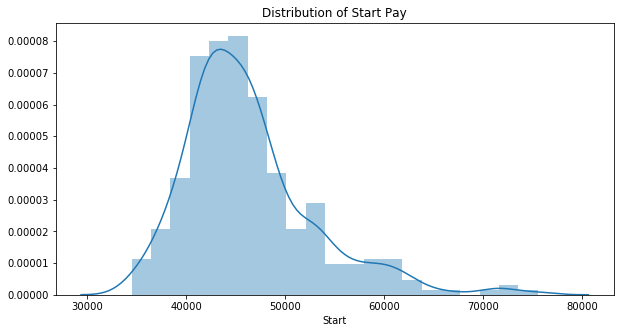

In [26]:
plt.figure(figsize=(10,5))
sns.distplot(salaries_region_result['Start'])
plt.title('Distribution of Start Pay')

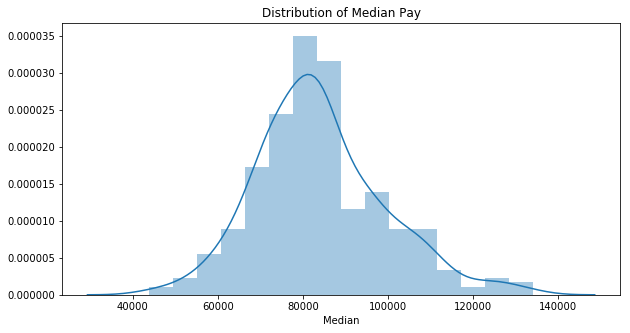

In [27]:
plt.figure(figsize=(10,5))
plt.title('Distribution of Median Pay')
sns.distplot(salaries_region_result['Median'])

We try to find out the relationship between start and median salary and find out that they are indeed very
closely related
We then construct a regression line that best helps to explain this relationship

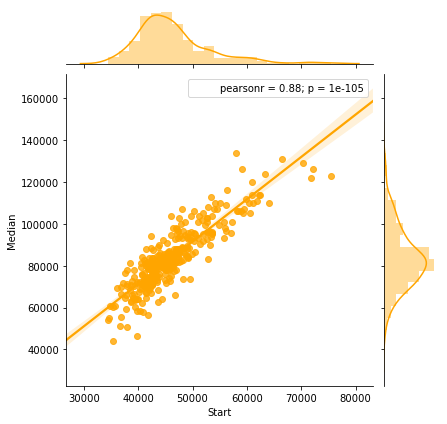

In [28]:
sns.jointplot(x='Start',y='Median',data=salaries_region_result,kind = 'reg', color='orange')

We know how the ssalary ranges based on geographical loication. To further explore this, we construct a barplot
to study the mean starting salary based on categorical locations

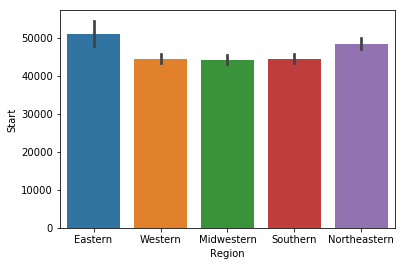

In [29]:
sns.barplot(x ='Region',y ='Start', data = salaries_region_result)

The plot confirms what we had always known. 'Eastern' regions in California and 'NorthEastern' regions have 
the highest mean Starting salary. This makes sense, as they are also known to have one of the highest living costs
in the country.

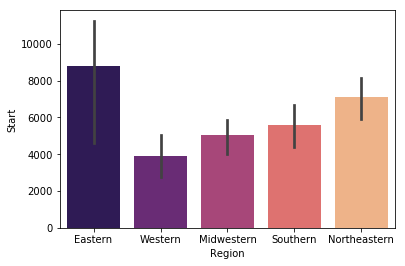

In [30]:
# We can also set an estimator like standard deviation if we want to find out the distribution/spread of data
sns.barplot(x ='Region',y ='Start', data = salaries_region_result,palette = 'magma', estimator = np.std)

We find that variability is maximum across Eastern region. An important point to note is that the NorthEastern 
region also has a considerable range in their Starting Salary despite having a higher mean starting salary.

In [31]:
# Here we find out the number of instances of each categorical variable.
salaries_college['Type'].value_counts()

State           175
Liberal Arts     47
Party            20
Engineering      19
Ivy League        8
Name: Type, dtype: int64

We compare the starting median salary of different types of colleges. We find that the highest salaries are
earned by people enrolled at either an engineering colleges or ivy-league colleges. 
Also, note that the mean starting salary of Ivy league colleges is just slightly higher than an Engineering college.
Now, considering that the cost involved in attending an Ivy League college is significantly higher, we can infer
that from a return on investment point of view, attending an Ivy League college is probably not the best idea, and
a good engineering college would ensure that your dollar goes a long way!

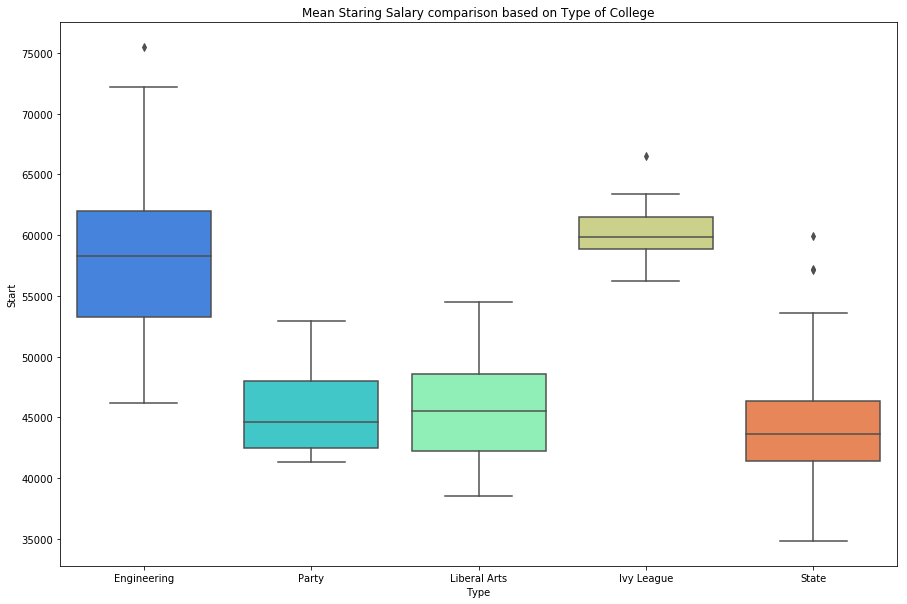

In [32]:
plt.figure(figsize=(15,10))
sns.boxplot(x ='Type',y='Start',data = salaries_college,palette='rainbow')
plt.title('Mean Staring Salary comparison based on Type of College')

# Thank You!!